<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/03_introduction_to_computer_vision_multi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class image Classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline and reduce overfitting)
7. Repeat until satisfied.

In [1]:
outline='''
1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline and reduce overfitting)
7. Repeat until satisfied.
'''

## 1__ Become one with the Data

In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-02-18 23:32:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   203MB/s    in 2.4s    

2023-02-18 23:32:22 (203 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
# unzip our data 
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# walk through the classes of food image data
import os
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/test'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '/content/10_food_classes_all_data/test/hamburge

In [5]:
!ls /content/10_food_classes_all_data

test  train


In [6]:
!ls /content/10_food_classes_all_data/

test  train


In [7]:
# Set up the train and test directories
train_dir = "/content/10_food_classes_all_data/train/"
test_dir = "/content/10_food_classes_all_data/test/"

In [8]:
# Let's get the class names 
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [9]:
def view_random_image(target_dir, target_class):
  # import required libraries
  import matplotlib.pyplot as plt
  import matplotlib.image as mpimg
  import random
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # randomly sample 1 of the items in here
  print(random_image)

  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print (f"Image shape: {img.shape}") # show the shape of the image

  return img

['1209257.jpg']
Image shape: (512, 512, 3)


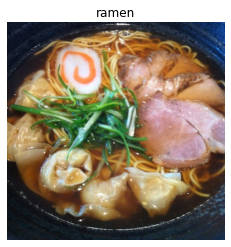

In [10]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [12]:
random.choice(range(50))

24

## 2__ Preprocess the data

* Normalize and standardize
* Turn it into batches
* Do some data augmentation

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [77]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  #  rotation_range=0.2,
                                  #  shear_range=0.2,
                                  #  zoom_range=0.2,
                                  #  width_shift_range=0.2,
                                  #  height_shift_range=0.3,
                                  #  horizontal_flip=True
)
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               seed=42)



Found 7500 images belonging to 10 classes.


In [26]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             seed=42)

Found 2500 images belonging to 10 classes.


In [21]:
len(train_data), len(test_data)

(235, 79)

In [ ]:
# Checked against the batches to confirm size

## 3__ Create the model

In [57]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy


In [48]:
model_1 = Sequential([
    Conv2D (filters=10,kernel_size=3,activation="relu", input_shape=(224,224,3)),
    Conv2D (10,3,activation="relu"),
    MaxPool2D (2),
    Conv2D (10,3,activation="relu"),
    Conv2D (10,3,activation="relu"),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation="softmax")
])
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_41 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_43 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [60]:
# Either way will work. this method separates the Activation

model_1 = Sequential([
    Conv2D (filters=10,kernel_size=3,input_shape=(224,224,3)),
    Activation("relu"),
    Conv2D(10,3),
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10,3),
    Conv2D(10,3),
    Activation("relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10),
    Activation("softmax")

])
model_1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_8 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_53 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_9 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 108, 108, 10)      910       
                                                     

In [64]:
model_1.compile(loss=CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics="accuracy")

## 4__ Fit our model

In [65]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data),
                        verbose=2)

Epoch 1/5
235/235 - 48s - loss: 2.1533 - accuracy: 0.2097 - val_loss: 1.9869 - val_accuracy: 0.2936 - 48s/epoch - 204ms/step
Epoch 2/5
235/235 - 45s - loss: 1.8107 - accuracy: 0.3791 - val_loss: 1.9854 - val_accuracy: 0.3068 - 45s/epoch - 190ms/step
Epoch 3/5
235/235 - 47s - loss: 1.1844 - accuracy: 0.6045 - val_loss: 2.2380 - val_accuracy: 0.3064 - 47s/epoch - 199ms/step
Epoch 4/5
235/235 - 46s - loss: 0.4480 - accuracy: 0.8595 - val_loss: 3.3062 - val_accuracy: 0.2872 - 46s/epoch - 197ms/step
Epoch 5/5
235/235 - 47s - loss: 0.1477 - accuracy: 0.9583 - val_loss: 4.8982 - val_accuracy: 0.2656 - 47s/epoch - 201ms/step


In [63]:
!nvidia-smi

Sun Feb 19 00:17:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    26W /  70W |   2424MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [66]:
model_1.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 4.8982 - accuracy: 0.2656


[4.898200988769531, 0.2655999958515167]

In [70]:
import matplotlib.pyplot as plt


In [71]:
def plot_loss_curves(history):
  '''
  returns separate loss curves for training and validation metrics
  '''
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.figure()
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("label")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="validation accuracy")
  plt.title("label")
  plt.xlabel("epochs")
  plt.legend()

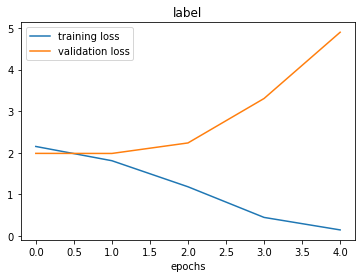

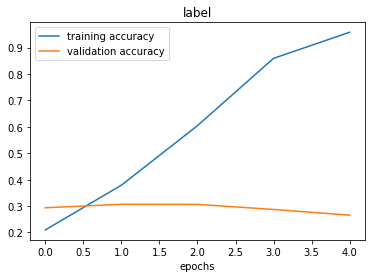

In [72]:
# Check out the model's loss curves
plot_loss_curves(history_1)

**Observation**: This is a clear case of overfitting to the training set badly. 

In [75]:
print(outline)


1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline and reduce overfitting)
7. Repeat until satisfied.



## 6__ Improving the model

It's clear that our model is learning but it's not generally to unseen data. Let's try to fix overfitting:
* Get more data,
* Simplify the model - reduce the number of hidden layers or hidden units
* Data augmentation of the training data
* test longer
* transfer learning

### simplify the model

In [ ]:

model_1.summary()

* 💡 Let's remove 2 Conv2D layer

In [82]:
model_2 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3), activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax")
])
model_2.compile(loss="categorical_crossentropy",
                 optimizer="Adam",
                 metrics="accuracy")
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)              

In [83]:
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 200ms/step - loss: 2.1059 - accuracy: 0.2449 - val_loss: 1.8865 - val_accuracy: 0.3396
Epoch 2/5
235/235 [==============================] - 55s 233ms/step - loss: 1.6923 - accuracy: 0.4327 - val_loss: 1.8451 - val_accuracy: 0.3500
Epoch 3/5
235/235 [==============================] - 56s 237ms/step - loss: 1.2243 - accuracy: 0.6111 - val_loss: 1.9626 - val_accuracy: 0.3488
Epoch 4/5
235/235 [==============================] - 53s 227ms/step - loss: 0.7538 - accuracy: 0.7715 - val_loss: 2.3016 - val_accuracy: 0.3196
Epoch 5/5
235/235 [==============================] - 50s 213ms/step - loss: 0.4066 - accuracy: 0.8905 - val_loss: 2.6757 - val_accuracy: 0.2956


In [ ]:
# Check out the new loss curves
plot_loss_curves(history_2)


* No improvement by simplifying the model. Notice that even though we removed 2 layers, the second model still has more parameters.

### data augmentation

In [86]:
train_augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_data = train_augmented_datagen.flow_from_directory(train_dir,
                                                         batch_size=32,
                                                         target_size=(224,224),
                                                         class_mode="categorical",
                                                         shuffle=True
)

Found 7500 images belonging to 10 classes.


`clone_model` replicates an existing model's architecture but not any of its learned weights and biases.

In [90]:
model_3 = tf.keras.models.clone_model(model_2)
model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)              

In [91]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 29160)             0         
                                                                 
 dense_14 (Dense)            (None, 10)              

In [93]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 524ms/step - loss: 2.1940 - accuracy: 0.1936 - val_loss: 2.0317 - val_accuracy: 0.2776
Epoch 2/5
235/235 [==============================] - 123s 523ms/step - loss: 2.0728 - accuracy: 0.2596 - val_loss: 1.9613 - val_accuracy: 0.3032
Epoch 3/5
235/235 [==============================] - 113s 483ms/step - loss: 2.0251 - accuracy: 0.2888 - val_loss: 1.8720 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 114s 484ms/step - loss: 1.9857 - accuracy: 0.3080 - val_loss: 1.8610 - val_accuracy: 0.3560
Epoch 5/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9413 - accuracy: 0.3355 - val_loss: 1.8383 - val_accuracy: 0.3732


In [ ]:
!nvidia-smi

In [94]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 1.8383 - accuracy: 0.3732


[1.8382800817489624, 0.373199999332428]

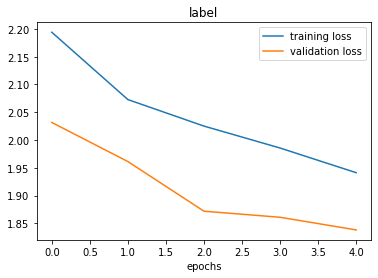

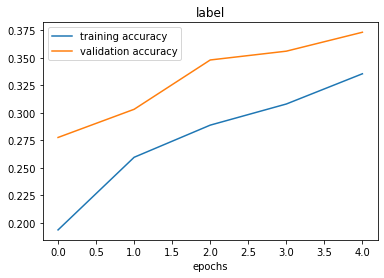

In [95]:
plot_loss_curves(history_3)

* That looks much better. The loss curves are closer to each other than in the baseline model. So it looks like they're heading in the right direction and will get better results if left to train longer.

In [96]:
print(outline)


1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline and reduce overfitting)
7. Repeat until satisfied.



## 7__ Repeat until satisfied